<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
bike_df = pd.read_csv("/content/sample_data/train.csv")

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month']= bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [8]:
drop_columns = ['datetime', 'casual' , 'registered']
bike_df.drop(drop_columns, axis=1 , inplace=True)

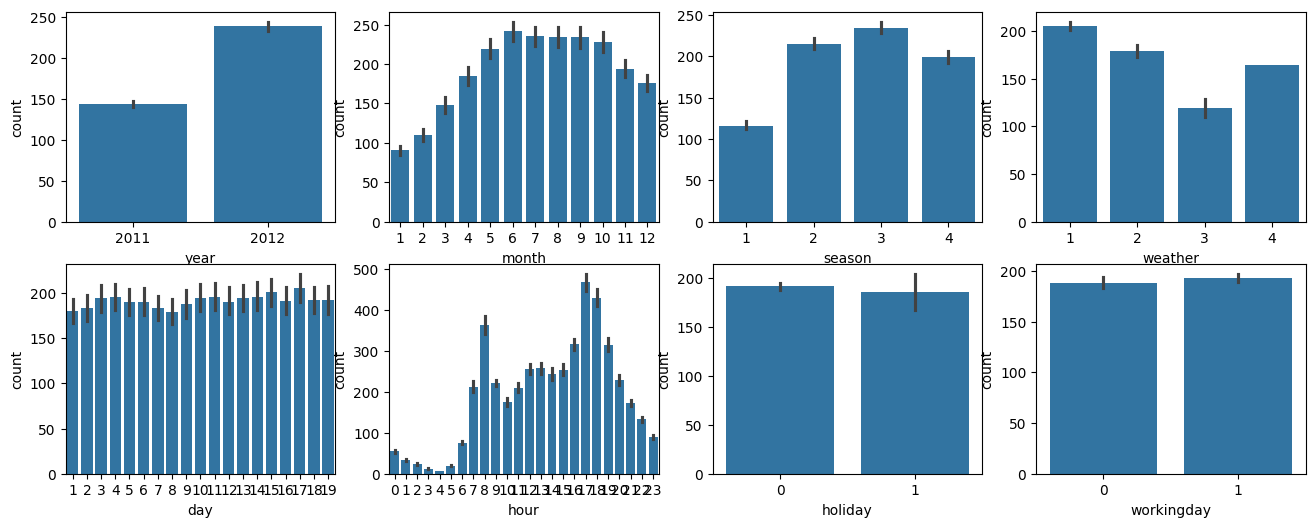

In [9]:
fig ,axs = plt.subplots(figsize=(16,6), ncols = 4 , nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
for i ,feature in enumerate(cat_features):
  row = int(i/4)
  column = i%4
  sns.barplot(x=feature, y='count', data = bike_df, ax = axs[row][column])

In [10]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_reg(y,pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y,pred)

  mae_val = mean_absolute_error(y, pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))


In [11]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
y_target = bike_df['count']

x_features = bike_df.drop(['count'], axis=1, inplace=False)

x_train, x_test , y_train, y_test = train_test_split(x_features, y_target , test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

evaluate_reg(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [12]:
y_target_log = np.log1p(y_target)
x_train, x_test, y_train, y_test = train_test_split(x_features , y_target_log, test_size=0.3 , random_state =0 )
lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)

pred = lr_reg.predict(x_test)


In [13]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_reg(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


In [14]:
# 원 핫 인코딩 후 재학습

x_features_ohe = pd.get_dummies(x_features, columns=['year','month','day', 'hour', 'holiday' , 'workingday', 'season', 'weather'])
x_train, x_test , y_train, y_test = train_test_split(x_features_ohe, y_target_log, test_size=0.3 , random_state=0)

def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=False):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)

  if is_expm1:
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)

  print('###',model.__class__.__name__,'###')
  evaluate_reg(y_test, pred)

In [15]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha =10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.124, MAE: 31.006
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.321, MAE: 32.731
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE: 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
